In [1]:
!pip install --upgrade  pip
!pip install numpy
!pip install pandas 
!pip install scikit-learn
!pip install xgboost 
!pip install seaborn
!pip install matplotlib
!pip install scikit-optimize
!pip install hyperopt

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
  Using cached xgboost-1.7.4-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.8 MB)
  Using cached scikit_optimize-0.9.0-py2.py3-none-any.whl (100 kB)
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)


### Importing Libraries 

In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


#### Reading CSVs

In [7]:
train_ipad = pd.read_csv("dc_ipads.csv")
ss = pd.read_csv("dc_signal_strength.csv")
ap_loc = pd.read_csv("dc_ap_locations.csv")
test_ipad = pd.read_csv("dc_test_data.csv")
ipads_info = pd.read_csv("ipads.csv")

In [4]:
train_ipad.head()

,iPad Name,iPad ID,iPad x,iPad y,Floor
0,Big Sur,0452f3638d1a,3.0,49.2,3
1,Lake Shasta,0452f36388d5,10.0,40.8,3
2,Santa Beach,0452f3670522,20.3,40.8,3
3,Pismo Beach,0452f3640b3e,21.1,30.0,3
4,Malibu,0452f3696eed,24.0,40.8,3


In [5]:
ss.head()

,iPad ID,Access Point ID,Signal Strength
0,0452f3638d1a,b45d50f656d0,43
1,0452f3638d1a,b45d50f656d0,43
2,0452f3638d1a,b45d50f656d0,43
3,0452f3638d1a,b45d50f656d0,43
4,0452f3638d1a,b45d50f656d0,43


In [6]:
ap_loc.head()

,Access Point ID,Access Point x,Access Point y
0,b45d50f656d0,2.725522,43.234657
1,b45d50f65730,25.640387,42.366589
2,b45d50f64a90,25.388924,18.573597
3,b45d50f66510,48.534828,35.651848
4,b45d50f80750,39.702026,50.005184


In [8]:
test_ipad.head()

,iPad Name,iPad ID,Access Point ID,Signal Strength,Access Point x,Access Point y
0,Carmel,0452f360ef9f,b45d50f65110,19,20.025663,53.434486
1,Carmel,0452f360ef9f,b45d50f806d0,29,32.063740,53.824329
2,Carmel,0452f360ef9f,b45d50f81bb0,9,48.208385,55.907330
3,Joshua Tree,0452f36c3d9d,b45d50f64bd0,20,89.621559,29.453739
4,Joshua Tree,0452f36c3d9d,b45d50f64ed0,39,76.194511,29.509821


In [9]:
train_ipad['Floor'].value_counts()

3    17
Name: Floor, dtype: int64

In [10]:
all_ipads = train_ipad['iPad ID'].unique().tolist() + test_ipad['iPad ID'].unique().tolist()

#### All Train and Test Data iPads

In [12]:
all_ipads

['0452f3638d1a',
 '0452f36388d5',
 '0452f3670522',
 '0452f3640b3e',
 '0452f3696eed',
 '0452f3619976',
 'e8b2ac05843d',
 '0452f36b08f1',
 '0452f36b0de7',
 '0452f36d447c',
 '0452f36b0df9',
 '0452f36bdd3b',
 '0452f36c37d6',
 '0452f36b2e85',
 '0452f36b0e74',
 '0452f36d4491',
 '0452f36af6e6',
 '0452f360ef9f',
 '0452f36c3d9d',
 '0452f3641b87',
 '0452f36b0ded']

In [13]:
ipads_info.head()

,Unnamed: 0,Room_name,stamac,Serial Number,Last Inventory Update,iOS Version,x_on_floorplan_[m],y_on_floorplan_[m],floor_num
0,0,Mariner,e8b2ac04f168,DLXS832XHGJ1,3/21/18 13:36,11.2.2,87.0,46.0,0
1,1,Opportunity 1,e8b2ac029e9c,DLXS8352HGJ1,3/20/18 21:27,11.2.2,NaN,NaN,0
2,2,Opportunity 2,0452f36c759d,DLXS741PHGJ1,3/21/18 1:56,11.2.2,NaN,NaN,0
3,3,Voyager,e8b2ac04ee6c,DLXS82RQHGJ1,3/21/18 13:36,11.2.2,64.0,46.0,0
4,4,Pioneer,0452f36a626d,DLXS742GHGJ1,3/21/18 13:36,11.2.2,69.0,46.0,0


In [15]:
ipads_info.loc[ipads_info['stamac'].isin(test_ipad['iPad ID'].unique().tolist()),]

,Unnamed: 0,Room_name,stamac,Serial Number,Last Inventory Update,iOS Version,x_on_floorplan_[m],y_on_floorplan_[m],floor_num
58,58,Lake Tahoe,0452f3641b87,DLXS6HJ9HGJ1,3/20/18 22:46,11.2.1,17.8,31.0,3
65,65,Santa Cruz,0452f36b0ded,DLXS73ZGHGJ1,3/21/18 1:41,11.2.1,63.6,44.8,3
68,68,Joshua Tree,0452f36c3d9d,DLXS72WZHGJ1,3/21/18 0:36,11.2.1,78.1,28.7,3
73,73,Carmel,0452f360ef9f,DLXS6G8LHGJ1,3/21/18 13:36,11.2.1,36.5,48.0,3


In [80]:
testipad = test_ipad['iPad ID'].unique().tolist()

In [17]:
ipad_ap = pd.merge(ss, train_ipad, how = 'left', on = 'iPad ID')

In [18]:
ipad_ap

,iPad ID,Access Point ID,Signal Strength,iPad Name,iPad x,iPad y,Floor
0,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3
1,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3
2,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3
3,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3
4,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3
...,...,...,...,...,...,...,...
20679,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3
20680,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3
20681,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3
20682,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3


In [19]:
ipad_ap_loc = pd.merge(ipad_ap, ap_loc, how = 'left', on = "Access Point ID")
ipad_ap_loc

,iPad ID,Access Point ID,Signal Strength,iPad Name,iPad x,iPad y,Floor,Access Point x,Access Point y
0,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657
1,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657
2,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657
3,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657
4,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657
...,...,...,...,...,...,...,...,...,...
20679,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479
20680,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479
20681,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479
20682,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479


In [28]:
ipad_ap_loc['Euc_dist'] = (ipad_ap_loc['iPad x'] - ipad_ap_loc['Access Point x'])**2 + (ipad_ap_loc['iPad y'] - ipad_ap_loc['Access Point y'])**2
ipad_ap_loc['Man_dist'] = abs(ipad_ap_loc['iPad x'] - ipad_ap_loc['Access Point x']) + abs(ipad_ap_loc['iPad y'] - ipad_ap_loc['Access Point y'])

In [29]:
ipad_ap_loc

,iPad ID,Access Point ID,Signal Strength,iPad Name,iPad x,iPad y,Floor,Access Point x,Access Point y,Euc_dist,Man_dist
0,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657,35.660652,6.239821
1,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657,35.660652,6.239821
2,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657,35.660652,6.239821
3,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657,35.660652,6.239821
4,0452f3638d1a,b45d50f656d0,43,Big Sur,3.0,49.2,3,2.725522,43.234657,35.660652,6.239821
...,...,...,...,...,...,...,...,...,...,...,...
20679,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479,834.807771,33.992253
20680,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479,834.807771,33.992253
20681,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479,834.807771,33.992253
20682,0452f36af6e6,b45d50f64ef0,6,Sequoia National Park,89.9,7.6,3,84.241226,35.933479,834.807771,33.992253


#### Correlation between Signal Strength and Distance 

<AxesSubplot:>

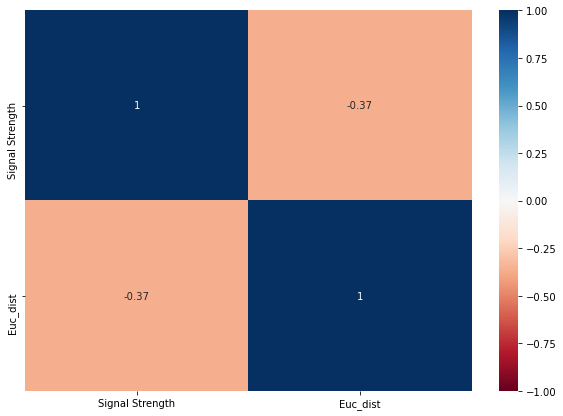

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(ipad_ap_loc[["Signal Strength", "Euc_dist"]].corr(), vmax=1, vmin=-1, cmap='RdBu', annot=True)

In [26]:
ipad_ap_loc[["Signal Strength", "Euc_dist"]].corr()

,Signal Strength,Euc_dist
Signal Strength,1.000000,-0.365388
Euc_dist,-0.365388,1.000000


In [30]:
ipad_ap_loc[["Signal Strength", "Man_dist"]].corr()

,Signal Strength,Man_dist
Signal Strength,1.000000,-0.464078
Man_dist,-0.464078,1.000000


### Simple Linear Regression - X- Signal Strength & Y- Euclidean Distance between APs and iPads


In [42]:
model = LinearRegression()
x = ipad_ap_loc["Signal Strength"].to_numpy().reshape((-1, 1))
y = ipad_ap_loc['Man_dist'].to_numpy()

model.fit(x,y )
r = model.score(x, y)
print(f"coefficient of determination: {r}")

coefficient of determination: 0.21536882389389134


In [39]:
np.shape(ipad_ap_loc["Signal Strength"].to_numpy().reshape((-1, 1)))

(20684, 1)

In [43]:
y_pred = model.predict(x)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mean_absolute_error(y_pred, y)


10.276063558287385

In [50]:
mean_absolute_percentage_error(y_pred, y)

0.5663984019155615

#### Correlation all important Variables 

In [54]:
ds = ipad_ap_loc[["Signal Strength", "Access Point x", "Access Point y", "Man_dist"]].corr()

<AxesSubplot:>

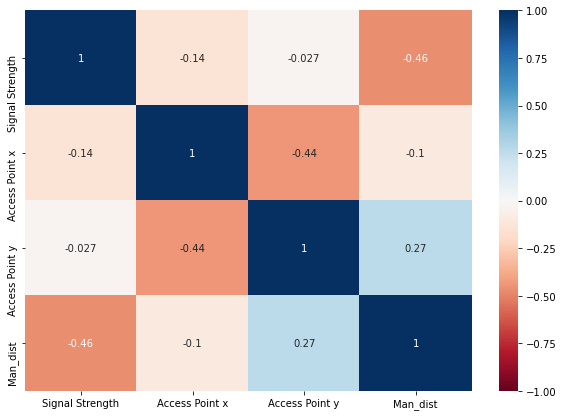

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(ds, vmax=1, vmin=-1, cmap='RdBu', annot=True)

In [57]:
test_ipad['dist_pred'] = model.predict(test_ipad['Signal Strength'].to_numpy().reshape((-1, 1)))

In [58]:
test_ipad


,iPad Name,iPad ID,Access Point ID,Signal Strength,Access Point x,Access Point y,dist_pred
0,Carmel,0452f360ef9f,b45d50f65110,19,20.025663,53.434486,21.146832
1,Carmel,0452f360ef9f,b45d50f806d0,29,32.063740,53.824329,13.846029
2,Carmel,0452f360ef9f,b45d50f81bb0,9,48.208385,55.907330,28.447636
3,Joshua Tree,0452f36c3d9d,b45d50f64bd0,20,89.621559,29.453739,20.416752
4,Joshua Tree,0452f36c3d9d,b45d50f64ed0,39,76.194511,29.509821,6.545225
5,Joshua Tree,0452f36c3d9d,b45d50f65390,29,64.111328,29.171188,13.846029
6,Lake Tahoe,0452f3641b87,b45d50f646d0,22,4.609490,18.637911,18.956591
7,Lake Tahoe,0452f3641b87,b45d50f64a90,21,25.388924,18.573597,19.686671
8,Lake Tahoe,0452f3641b87,b45d50f64bd0,12,89.621559,29.453739,26.257395
9,Lake Tahoe,0452f3641b87,b45d50f64db0,20,14.380159,18.573597,20.416752


In [67]:
test_ipad.loc[test_ipad['iPad ID'] == '0452f360ef9f', 'Access Point y'][2]

55.9073295593

#### Predicting X, Y values of iPads using multiple distances from Known Points

#### Trilateration - Circles 

In [103]:
# known points and their coordinates
ap = {
    'point1': np.array([test_ipad.loc[test_ipad['iPad ID'] == '0452f360ef9f', 'Access Point x'][0], test_ipad.loc[test_ipad['iPad ID'] == '0452f360ef9f', 'Access Point y'][0]]),  # format: (x, y)
    'point2': np.array([test_ipad.loc[test_ipad['iPad ID'] == '0452f360ef9f', 'Access Point x'][1], test_ipad.loc[test_ipad['iPad ID'] == '0452f360ef9f', 'Access Point y'][1]]),
    'point3': np.array([test_ipad.loc[test_ipad['iPad ID'] == '0452f360ef9f', 'Access Point x'][2], test_ipad.loc[test_ipad['iPad ID'] == '0452f360ef9f', 'Access Point y'][2]])
}

# distances from unknown point to each known point
dis_pred = {
    'point1': test_ipad.loc[test_ipad['iPad ID'] == '0452f360ef9f', 'dist_pred'][0],
    'point2': test_ipad.loc[test_ipad['iPad ID'] == '0452f360ef9f', 'dist_pred'][1],
    'point3': test_ipad.loc[test_ipad['iPad ID'] == '0452f360ef9f', 'dist_pred'][2]
}

In [104]:
ap

{'point1': array([20.02566338, 53.43448639]),
 'point2': array([32.06373978, 53.82432938]),
 'point3': array([48.20838547, 55.90732956])}

In [105]:
radii = {key: distances[key] for key in known_points}

In [106]:
radii

{'point1': 21.146832135494765,
 'point2': 13.846028608800783,
 'point3': 28.447635662188745}

In [109]:
# find ALL intersection points of circles
intersections = []
for p1, p2, p3 in [(k1, k2, k3) for k1 in ap for k2 in ap for k3 in ap if k1 < k2 < k3]:
    r1, r2, r3 = radii[p1], radii[p2], radii[p3]
    if np.linalg.norm(known_points[p1] - ap[p2]) < r1 + r2 and np.linalg.norm(ap[p2] - ap[p3]) < r2 + r3:
        # circles intersect at two points
        d = np.linalg.norm(ap[p1] - ap[p3])
        a = (r1**2 - r2**2 + d**2) / (2*d)
        h = np.sqrt(r1**2 - a**2)
        x2 = ap[p1][0] + a * (ap[p3][0] - ap[p1][0]) / d
        y2 = ap[p1][1] + a * (ap[p3][1] - ap[p1][1]) / d
        x3_1 = x2 + h * (ap[p3][1] - ap[p1][1]) / d
        y3_1 = y2 - h * (ap[p3][0] - ap[p1][0]) / d
        x3_2 = x2 - h * (ap[p3][1] - ap[p1][1]) / d
        y3_2 = y2 + h * (ap[p3][0] - ap[p1][0]) / d
        intersections.append(((x3_1 + x3_2)/2, (y3_1+y3_2)/2))


In [110]:
intersections

[(38.61488927573511, 55.06556518117923)]

In [ ]:
filtered_intersections = []
for x, y in intersections:
    

In [113]:
inter_point = {}
for i in testipad:
    
    # known points and their coordinates
    df = test_ipad.loc[test_ipad['iPad ID'] == i].reset_index()
    print(df['iPad Name'])
    
    ap = {
        'point1': np.array([df['Access Point x'][0], df['Access Point y'][0]]),  # format: (x, y)
        'point2': np.array([df['Access Point x'][1], df[ 'Access Point y'][1]]),
        'point3': np.array([df['Access Point x'][2], df ['Access Point y'][2]])
    }

    # distances from unknown point to each known point
    dis_pred = {
        'point1': df['dist_pred'][0],
        'point2': df['dist_pred'][1],
        'point3': df['dist_pred'][2]
    }
    
    radii = {key: distances[key] for key in ap}
    
    # find intersection points of circles
    
    int_sect = []
    for p1, p2, p3 in [(k1, k2, k3) for k1 in ap for k2 in ap for k3 in ap if k1 < k2 < k3]:
        r1, r2, r3 = radii[p1], radii[p2], radii[p3]
        if np.linalg.norm(ap[p1] - ap[p2]) < r1 + r2 and np.linalg.norm(ap[p2] - ap[p3]) < r2 + r3:
            # circles intersect at two points
            d = np.linalg.norm(ap[p1] - ap[p3])
            a = (r1**2 - r2**2 + d**2) / (2*d)
            h = np.sqrt(abs(r1**2 - a**2))
            x2 = ap[p1][0] + a * (ap[p3][0] - ap[p1][0]) / d
            y2 = ap[p1][1] + a * (ap[p3][1] - ap[p1][1]) / d
            x3_1 = x2 + h * (ap[p3][1] - ap[p1][1]) / d
            y3_1 = y2 - h * (ap[p3][0] - ap[p1][0]) / d
            x3_2 = x2 - h * (ap[p3][1] - ap[p1][1]) / d
            y3_2 = y2 + h * (ap[p3][0] - ap[p1][0]) / d
            int_sect.append(((x3_1 + x3_2)/2, (y3_1+y3_2)/2))  ### Taking Average of those Intersections
            
    inter_point[i] = int_sect

0    Carmel
1    Carmel
2    Carmel
Name: iPad Name, dtype: object
0    Joshua Tree
1    Joshua Tree
2    Joshua Tree
Name: iPad Name, dtype: object
0    Lake Tahoe
1    Lake Tahoe
2    Lake Tahoe
3    Lake Tahoe
4    Lake Tahoe
5    Lake Tahoe
6    Lake Tahoe
Name: iPad Name, dtype: object
0    Santa Cruz
1    Santa Cruz
2    Santa Cruz
3    Santa Cruz
4    Santa Cruz
5    Santa Cruz
6    Santa Cruz
Name: iPad Name, dtype: object


In [114]:
inter_point

{'0452f360ef9f': [(38.61488927573511, 55.06556518117923)],
 '0452f36c3d9d': [(71.85973350902174, 29.2570095385519)],
 '0452f3641b87': [],
 '0452f36b0ded': [(66.0473328124871, 50.36082018897567)]}

In [99]:
int_sect

[(69.77080332240514, 62.33642320921472),
 (62.323862302569054, 38.385217168736624)]

In [100]:
df['Access Point x']

0    89.524635
1    78.240944
2    48.208385
3    71.991318
4    58.797749
5    65.915436
6    53.937103
Name: Access Point x, dtype: float64

In [101]:
ipads_info.loc[ipads_info['stamac'].isin(test_ipad['iPad ID'].unique().tolist()),]

,Unnamed: 0,Room_name,stamac,Serial Number,Last Inventory Update,iOS Version,x_on_floorplan_[m],y_on_floorplan_[m],floor_num
58,58,Lake Tahoe,0452f3641b87,DLXS6HJ9HGJ1,3/20/18 22:46,11.2.1,17.8,31.0,3
65,65,Santa Cruz,0452f36b0ded,DLXS73ZGHGJ1,3/21/18 1:41,11.2.1,63.6,44.8,3
68,68,Joshua Tree,0452f36c3d9d,DLXS72WZHGJ1,3/21/18 0:36,11.2.1,78.1,28.7,3
73,73,Carmel,0452f360ef9f,DLXS6G8LHGJ1,3/21/18 13:36,11.2.1,36.5,48.0,3


In [116]:
inter_point['0452f360ef9f'][0][0]

38.61488927573511

In [134]:
inter_point['0452f3641b87']

[]

##### Couldn't find the intersection point for 1 iPad in the Test Data and didn't have time to figure out the reason. 

In [135]:
for k, v in inter_point.items():
    print(inter_point[k][0])

(38.61488927573511, 55.06556518117923)
(71.85973350902174, 29.2570095385519)


IndexError: list index out of range

#### Appending Predicted Values to the Test iPad Data

In [130]:
for k, v in inter_point.items():
    if len(inter_point[k]) == 0:
        test_ipad.loc[test_ipad['iPad ID'] == k, 'x_pred'] == np.nan
        test_ipad.loc[test_ipad['iPad ID'] == k, 'y_pred'] == np.nan
    else:
        test_ipad.loc[test_ipad['iPad ID'] == k, 'x_pred'] = inter_point[k][0][0]
        test_ipad.loc[test_ipad['iPad ID'] == k, 'y_pred'] = inter_point[k][0][1]
    


In [131]:
test_ipad

,iPad Name,iPad ID,Access Point ID,Signal Strength,Access Point x,Access Point y,dist_pred,x_pred,y_pred
0,Carmel,0452f360ef9f,b45d50f65110,19,20.025663,53.434486,21.146832,38.614889,55.065565
1,Carmel,0452f360ef9f,b45d50f806d0,29,32.063740,53.824329,13.846029,38.614889,55.065565
2,Carmel,0452f360ef9f,b45d50f81bb0,9,48.208385,55.907330,28.447636,38.614889,55.065565
3,Joshua Tree,0452f36c3d9d,b45d50f64bd0,20,89.621559,29.453739,20.416752,71.859734,29.257010
4,Joshua Tree,0452f36c3d9d,b45d50f64ed0,39,76.194511,29.509821,6.545225,71.859734,29.257010
5,Joshua Tree,0452f36c3d9d,b45d50f65390,29,64.111328,29.171188,13.846029,71.859734,29.257010
6,Lake Tahoe,0452f3641b87,b45d50f646d0,22,4.609490,18.637911,18.956591,NaN,NaN
7,Lake Tahoe,0452f3641b87,b45d50f64a90,21,25.388924,18.573597,19.686671,NaN,NaN
8,Lake Tahoe,0452f3641b87,b45d50f64bd0,12,89.621559,29.453739,26.257395,NaN,NaN
9,Lake Tahoe,0452f3641b87,b45d50f64db0,20,14.380159,18.573597,20.416752,NaN,NaN


In [132]:
test_ipad.to_csv("OutPut_Predicted_X_Y_Co-ord.csv", index = False)